In [9]:
import pandas as pd
setD = pd.read_excel('preprocessed-dataset.xlsx',sep=',')
#print(setD)
#Doc = setD['preprocessed_judul'].astype('str')
Doc = pd.read_csv("test.csv", sep=',')
Doc = Doc.stemming_judul
#print(Doc)
# kunci = pd.read_excel('query.xlsx',sep=',')
# query = kunci['judul'].astype('str')
query = ['analysis training parameters classifiers based haarlike features detect human fac']

In [10]:
# Kita mulai dengan membuat VSM-nya
# kita gunakan perintah yang ada di Segmen sebelumnya 
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer()

tf = tf_vectorizer.fit_transform(Doc)
tf_terms = tf_vectorizer.get_feature_names()
# Mengapa tf bukan tfidf?
# Blei, D. M., Ng, A. Y., & Jordan, M. I. (2003). Latent dirichlet allocation. Journal of machine Learning research, 3(Jan), 993-1022.
# Saran: untuk penelitian VS di Industri.
tf.shape

(4, 16)

In [11]:
from sklearn.decomposition import TruncatedSVD
n_topics = 4
lsa = TruncatedSVD(n_components=n_topics,algorithm='randomized',n_iter=10).fit(tf)
lsa

TruncatedSVD(algorithm='randomized', n_components=4, n_iter=10,
       random_state=None, tol=0.0)

In [30]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

n_topics = 4
lda = LDA(n_components=n_topics, learning_method='batch', random_state=0).fit(tf)   
lda

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=4, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [24]:
# Melihat Topik-topiknya
vsm_topics = lsa.transform(tf)
print(vsm_topics.shape)
vsm_topics[:10]
# Ukuran kolom = #Topics ==> Dimension Reduction

(4, 4)


array([[ 1.98782166e+00, -5.16399719e-01, -5.30939166e-01,
        -1.22474487e+00],
       [ 9.16967234e-01,  2.00056236e+00, -3.96132983e-01,
        -3.11042654e-16],
       [ 1.98782166e+00, -5.16399719e-01, -5.30939166e-01,
         1.22474487e+00],
       [ 1.48828725e+00,  1.46860732e-01,  1.66235766e+00,
        -2.54430885e-15]])

In [25]:
# Seandainya diasumsikan 1 dokumen hanya 1 topic dengan nilai skor topic terbesar
from tqdm import tqdm_notebook as tqdm
doc_topic =  [a.argmax()+1 for a in tqdm(vsm_topics)] # topic of docs
doc_topic[:10]
# kemudian kita lihat topik penyebarannya

A Jupyter Widget

[1, 2, 1, 3]

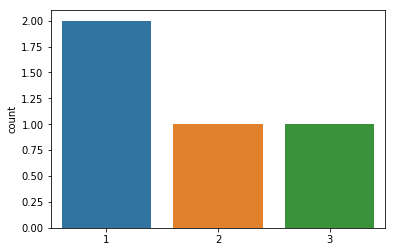

In [26]:
import warnings; warnings.simplefilter('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
# mari kita plot
sns.countplot(doc_topic)
plt.show()

In [27]:
import pickle, taudata as tau
# Mari kita coba maknai masing-masing topic ini
Top_Words=7
print('Printing top {0} Topics, with top {1} Words:'.format(n_topics, Top_Words))
tau.print_Topics(lsa, tf_terms, n_topics, Top_Words)

Printing top 4 Topics, with top 7 Words:
Topic #1:
learning sistem bas motivasi model komunita sourc
Topic #2:
strategi situs kelola ajar learning multimedia kembang
Topic #3:
grati multimedia kembang sistem learning ajar strategi
Topic #4:
sourc pilih open bas ajar sistem learning


In [28]:
# %matplotlib inline
# Mari kita Plot, supaya lebih jelas
# Catatan, bergantung dari laptop yang digunakan, image terkadang cukup lama untuk muncul.
import pyLDAvis, pyLDAvis.sklearn; pyLDAvis.enable_notebook()

pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)

PreparedData(topic_coordinates=            Freq  cluster  topics         x             y
topic                                                    
3      41.689939        1       1  0.096920  1.692891e-07
0      27.227332        1       2 -0.054712  5.454249e-02
2      27.227328        1       3 -0.054711 -5.454251e-02
1       3.855401        1       4  0.012502 -1.492673e-07, topic_info=     Category      Freq        Term     Total  loglift  logprob
term                                                           
1     Default  1.000000         bas  1.000000  16.0000  16.0000
5     Default  1.000000    komunita  1.000000  15.0000  15.0000
7     Default  1.000000       model  1.000000  14.0000  14.0000
8     Default  1.000000    motivasi  1.000000  13.0000  13.0000
10    Default  1.000000        open  1.000000  12.0000  12.0000
11    Default  1.000000       pilih  1.000000  11.0000  11.0000
14    Default  1.000000       sourc  1.000000  10.0000  10.0000
0     Default  1.000000        ajar  1.000000   9.0000   9.0000
3     Default  1.000000      kelola  1.000000   8.0000   8.0000
13    Default  1.000000       situs  1.000000   7.0000   7.0000
15    Default  1.000000    strategi  1.000000   6.0000   6.0000
2     Default  1.000000       grati  1.000000   5.0000   5.0000
4     Default  1.000000     kembang  1.000000   4.0000   4.0000
9     Default  1.000000  multimedia  1.000000   3.0000   3.0000
12    Default  2.000000      sistem  2.000000   2.0000   2.0000
6     Default  3.000000    learning  3.000000   1.0000   1.0000
15     Topic1  0.819153    strategi  1.171691   0.5170  -2.4156
13     Topic1  0.819153       situs  1.171691   0.5170  -2.4156
3      Topic1  0.819153      kelola  1.171691   0.5170  -2.4156
0      Topic1  0.819153        ajar  1.171691   0.5170  -2.4156
9      Topic1  0.819143  multimedia  1.171690   0.5170  -2.4156
4      Topic1  0.819143     kembang  1.171690   0.5170  -2.4156
2      Topic1  0.819143       grati  1.171690   0.5170  -2.4156
6      Topic1  1.475032    learning  3.024860   0.1567  -1.8275
12     Topic1  0.815351      sistem  2.368966  -0.1917  -2.4203
14     Topic1  0.163905       sourc  1.115075  -1.0425  -4.0246
11     Topic1  0.163905       pilih  1.115075  -1.0425  -4.0246
10     Topic1  0.163905        open  1.115075  -1.0425  -4.0246
8      Topic1  0.163905    motivasi  1.115078  -1.0425  -4.0246
7      Topic1  0.163905       model  1.115078  -1.0425  -4.0246
...       ...       ...         ...       ...      ...      ...
5      Topic3  0.748435    komunita  1.115078   0.9023  -2.0799
1      Topic3  0.748463         bas  1.713881   0.4725  -2.0798
12     Topic3  0.750271      sistem  2.368966   0.1512  -2.0774
6      Topic3  0.748380    learning  3.024860  -0.0958  -2.0799
14     Topic3  0.149746       sourc  1.115075  -0.7068  -3.6889
11     Topic3  0.149746       pilih  1.115075  -0.7068  -3.6889
10     Topic3  0.149746        open  1.115075  -0.7068  -3.6889
9      Topic3  0.149768  multimedia  1.171690  -0.7562  -3.6888
4      Topic3  0.149768     kembang  1.171690  -0.7562  -3.6888
2      Topic3  0.149768       grati  1.171690  -0.7562  -3.6888
15     Topic3  0.149763    strategi  1.171691  -0.7562  -3.6888
13     Topic3  0.149763       situs  1.171691  -0.7562  -3.6888
3      Topic3  0.149763      kelola  1.171691  -0.7562  -3.6888
0      Topic3  0.149763        ajar  1.171691  -0.7562  -3.6888
14     Topic4  0.052993       sourc  1.115075   0.2092  -2.7730
11     Topic4  0.052993       pilih  1.115075   0.2092  -2.7730
10     Topic4  0.052993        open  1.115075   0.2092  -2.7730
8      Topic4  0.052993    motivasi  1.115078   0.2092  -2.7730
7      Topic4  0.052993       model  1.115078   0.2092  -2.7730
5      Topic4  0.052993    komunita  1.115078   0.2092  -2.7730
9      Topic4  0.053012  multimedia  1.171690   0.1600  -2.7726
4      Topic4  0.053012     kembang  1.171690   0.1600  -2.7726
2      Topic4  0.053012       grati  1.171690   0.1600  -2.7726
15     Topic4  0.053012  